# **Hand Written Digit Prediction- Classification Analysis**

**The digits dataset consist of 8x8 images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represent.**

# **Objective:** The objective of a handwritten digits prediction project using Python typically involves building a machine learning model that can accurately classify handwritten digits into their respective classes (0 through 9).

# **Import Library**

In [33]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

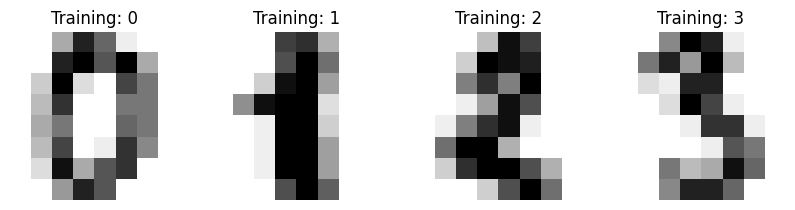

In [ ]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape(n_samples,-1)

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [53]:
rf.fit(X_train,y_train)
RandomForestClassifier()

RandomForestClassifier()

# **Predict Test Data**

In [55]:
y_pred = rf.predict(X_test)

In [56]:
y_pred

array([3, 3, 3, 6, 3, 7, 0, 1, 7, 8, 7, 3, 9, 3, 3, 4, 5, 8, 7, 3, 5, 8,
       3, 1, 2, 0, 6, 2, 3, 9, 1, 0, 3, 5, 1, 8, 1, 9, 6, 2, 6, 3, 1, 7,
       6, 8, 5, 0, 7, 6, 1, 3, 3, 3, 8, 1, 3, 8, 5, 5, 1, 5, 6, 6, 2, 0,
       4, 9, 7, 9, 3, 3, 4, 2, 6, 1, 6, 2, 2, 2, 2, 2, 4, 0, 6, 4, 2, 3,
       5, 6, 7, 2, 7, 3, 0, 5, 0, 0, 5, 6, 1, 4, 3, 2, 6, 4, 0, 8, 5, 0,
       9, 7, 6, 0, 4, 1, 7, 5, 1, 1, 8, 7, 1, 1, 4, 9, 6, 0, 8, 1, 6, 6,
       6, 8, 3, 1, 3, 1, 1, 4, 0, 1, 1, 3, 4, 5, 7, 7, 9, 3, 3, 9, 3, 4,
       6, 6, 5, 6, 0, 7, 1, 7, 3, 9, 3, 8, 2, 4, 1, 7, 1, 8, 4, 6, 0, 5,
       8, 6, 0, 9, 0, 8, 4, 2, 3, 2, 2, 7, 5, 9, 7, 3, 8, 8, 1, 6, 8, 7,
       8, 0, 3, 5, 7, 8, 2, 6, 4, 5, 9, 1, 8, 4, 7, 5, 6, 4, 6, 2, 1, 6,
       9, 1, 9, 0, 1, 5, 8, 2, 2, 3, 8, 9, 3, 4, 5, 5, 8, 2, 7, 8, 5, 8,
       5, 8, 7, 1, 6, 2, 0, 3, 2, 1, 8, 9, 6, 2, 3, 4, 1, 2, 9, 2, 5, 6,
       5, 9, 0, 5, 6, 2, 4, 9, 7, 3, 8, 3, 9, 2, 9, 0, 3, 9, 8, 1, 6, 1,
       0, 0, 5, 2, 1, 8, 0, 0, 1, 2, 3, 7, 3, 1, 6,

# **Model Accuracy**

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
confusion_matrix(y_test,y_pred)

array([[47,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 50,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 64,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 45,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]])

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        49
           1       0.93      1.00      0.96        55
           2       1.00      0.98      0.99        59
           3       1.00      0.97      0.98        58
           4       0.95      0.98      0.96        54
           5       0.96      0.96      0.96        52
           6       1.00      0.97      0.98        66
           7       0.98      1.00      0.99        51
           8       0.98      0.92      0.95        49
           9       0.96      1.00      0.98        47

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



**Explanation:**

A handwritten digit prediction project in Python typically involves building a machine learning model capable of recognizing handwritten digits from images. This is a classic problem in the field of computer vision and machine learning.

**Data Collection:** Obtain a dataset of handwritten digits along with their corresponding labels. These datasets contain thousands of grayscale images of handwritten digits (0 through 9) with their respective labels.

**Data Preprocessing:** Preprocess the dataset to prepare it for training. This may involve tasks such as:

**Normalization:** Scaling pixel values to a range between 0 and 1.
Reshaping: Reshaping the images to a format suitable for the chosen machine learning model.
**Splitting:** Splitting the dataset into training and testing sets for model evaluation.
**Model Selection:** Choose a machine learning model suitable for this classification task. Common choices include:
Random Forests

**Model Training:** Train the selected model using the training data. During training, the model learns to recognize patterns and features in the input images that correspond to different digits. The training process involves adjusting the model's parameters (weights and biases) to minimize a loss function.

**Model Evaluation:** Evaluate the trained model's performance on the testing data. Common evaluation metrics include accuracy (the percentage of correctly classified instances), precision, recall, and F1-score. This step helps assess how well the model generalizes to unseen data.

**Hyperparameter Tuning:** Fine-tune the model's hyperparameters to improve performance further. Hyperparameters include parameters that are not learned during training, such as learning rate, batch size, number of layers, etc. Techniques like grid search or random search can be used for hyperparameter tuning.
